# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `Team 16`
* Students: `Yinan Zhang, Yu-Ting Huang, Shengzhao Xia, Zhantao Deng`
* Dataset: `IMDb`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [1]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [2]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from pylab import *
from sklearn.cluster import KMeans

test [here](#test)

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [3]:
#load adjacency matrix
adjacency = np.load('adjacency.npy')  
np.fill_diagonal(adjacency,0)
adjacency[adjacency<0.5] = 0

#delete isolated nodes
degree = np.sum(adjacency, axis = 1)
adjacency = np.delete(adjacency, np.where(degree == 0)[0], 0)
adjacency = np.delete(adjacency, np.where(degree == 0)[0], 1)

#compute nodes and degrees
n_nodes = adjacency.shape[0]
degree = np.sum(adjacency, axis = 1)

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [4]:
#store matrices in CSR 
adjacency_csr = sparse.csr_matrix(adjacency)
degree_csr = sparse.csr_matrix(np.diag(degree))

laplacian_combinatorial = degree_csr - adjacency_csr
laplacian_normalized    = degree_csr.power(-0.5).dot(laplacian_combinatorial).dot(degree_csr.power(-0.5))

laplacian = laplacian_combinatorial.toarray() # Either laplacian_combinatorial or laplacian_normalized.

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

---

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(laplacian)
assert eigenvectors.shape == (n_nodes, n_nodes)

Justify your choice of eigensolver.

**Your answer here.**

For computing all eigenvalues and eigenvectors of the laplacian matrix, the function `np.linalg.eigh` is used and the eigenvalues are orderded.

---

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

**Your answer here.**
1. S is a N by M incidence matrix. N equals the number of nodes and M equals the number of edges. $S(i,j)$ is nonzero if edge j connects the node i and some node k, otherwise is zero.
2. x is the signal function defined on the vertices, $S^\top x$ computes the gradient of x along M edges.

---

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

**Your answer here.**

We have $SS^T = D - A = U^\top \Lambda U = \lambda_1 u_1u_1^T + \dots + \lambda_n u_nu_n^T$.

Thus $\|S^\top u_k \|_2^2 = u_k^TSS^Tu_k = u_k^T \big( \lambda_1 u_1u_1^T + \dots + \lambda_n u_nu_n^T \big) u_k = \lambda_ku_k^Tu_ku_k^Tu_k = \lambda_k$.

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

**Your answer here.**

It is a measurement of how smooth the signal is.

---

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

**Your annswer here.**

Theorectically, $u_0$ is the constant one vector $\mathbb{1}$ for the combinatorial Laplacian, and $D^{1/2}\mathbb{1}$ for the normalized Laplacian. For our combinatorial Laplacian, $u_0$ is also a constant vector. 

Below is a simple verification.

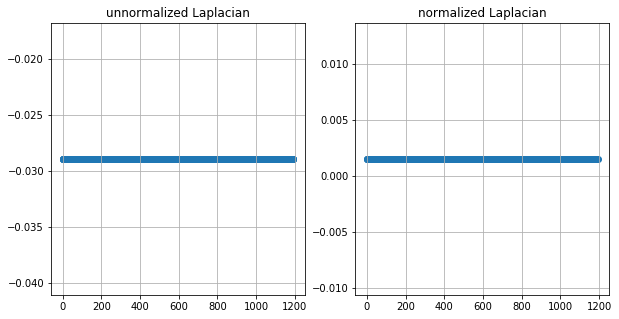

In [6]:
plt.figure(figsize=[10,5])

# Verification for combinatorial Laplacian, u_0 should be a constant vector.
plt.subplot(121)
eval1, evec1 =  sparse.linalg.eigs(laplacian_combinatorial, k = 1, which='SM')
plt.scatter(x = np.arange(0, n_nodes), y = np.real(evec1));
plt.grid()
plt.title('unnormalized Laplacian')

# Verification for normalized Laplacian, D^(-1/2)@u_0 should be a constant vector.
plt.subplot(122)
eval1, evec1 =  sparse.linalg.eigs(laplacian_normalized, k = 1, which='SM')
plt.scatter(x = np.arange(0, n_nodes), y = degree_csr.power(-0.5).dot(np.real(evec1)));
plt.grid()
plt.title('normalized Laplacian');

---

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

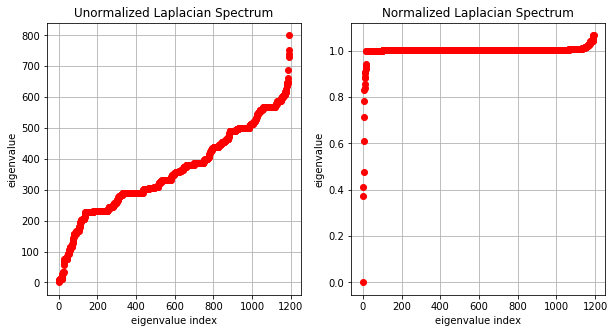

In [7]:
# Your code here.
plt.figure(figsize=[10,5])

plt.subplot(121)
plt.plot(eigenvalues, 'ro')
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue')
plt.title('Unormalized Laplacian Spectrum');
plt.grid()

eigenvalues_norm, eigenvectors_norm = np.linalg.eigh(laplacian_normalized.toarray())
plt.subplot(122)
plt.plot(eigenvalues_norm, 'ro')
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue')
plt.title('Normalized Laplacian Spectrum');

plt.grid()

**Your answer here.**

As we can see from the two figures above, there are continual changes in the eigenvalues of unnormalized Laplacian from 0 to 800. In contrast, most of the eigenvalues of normalized Laplacian are around 1.0 and there is a sharp increase in the first several eigenvalues. In the normalized laplacian spectrum, there is a gap after the first eigenvalue, which suggests that our graph has poor separability.

How many connected components are there in your graph? Answer using the eigenvalues only.

In [110]:
evals, evecs =  sparse.linalg.eigs(laplacian, k = 1, which='SM')
num_zero     = np.sum(evals <= 1e-6)

eval_lap, evecs     =  sparse.linalg.eigs(laplacian, k = 1, which='LM')
eval_normlap, evecs =  sparse.linalg.eigs(laplacian_normalized, k = 1, which='LM')

print(f'1.There is/are \033[1m{num_zero}\033[0m component(s) in our graph.\
      \n2.The largest eigenvalue of unnormalized laplacian is: {np.real(eval_lap[0]):.2f}\
      \n3.The largest eigenvalue of normalized laplacian is  : {np.real(eval_normlap[0]):.2f}')

1.There is/are 1 component(s) in our graph.      
2.The largest eigenvalue of unnormalized laplacian is: 799.88      
3.The largest eigenvalue of normalized laplacian is  : 1.07


Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

In [9]:
#compute the largest sum of absolute values of the unnormalized laplacian
np.max(np.sum(np.abs(laplacian),axis = 1))

1598.1202138324343

**Your answer here.** 

For the combinatorial Laplacian, the largest eigenvalue is upperbounded by the largest absolute row sum or column sum (applying Gershgorin circle theorem).  However, for the normalized Laplacian, the largest eigenvalue is lower than 2.

## 2 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

**Your answer here.**
1. In some cases, we have to develop appropriate representations for complex data, which means to simplify the data. Laplacian Eigenmaps is a kind of that method used to reduce the dimensionality of the data. 
2. Laplacian Eigenmaps constructing a representation for data lying on a low-dimensional manifold embedded in a high-dimensional space.
3. The dimensionality reduction in Laplacian Eigenmaps has locality-preserving properties and Laplacian Eigenmaps aims to  find intrinsically low-dimensional data lying in a very high-dimensional space.

---

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

Here we compute three eigenvectors: unnormalized, normalized and renormalized.

In [89]:
evals_unnorm, evecs_unnorm =  sparse.linalg.eigsh(laplacian, k = 3, which='SM')

evals_renorm, evecs_renorm =  sparse.linalg.eigsh(laplacian, k = 3, M=np.diag(degree), which='SM')
evecs_renorm_csr = sparse.csr_matrix(evecs_renorm)

evecs_norm_csr = degree_csr.power(0.5).dot(evecs_renorm_csr)
evecs_norm = evecs_norm_csr.toarray()

Plot the nodes embedded in 2D. Comment on what you see.

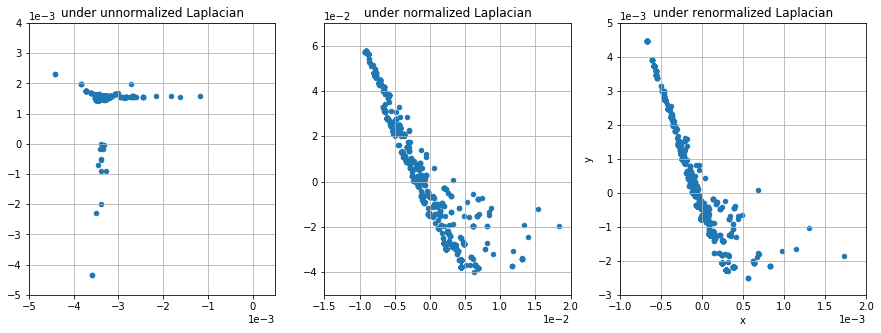

In [103]:
plt.figure(figsize=[15,5])

plt.subplot(131)
plt.scatter(np.real(evecs_unnorm[:,1]), np.real(evecs_unnorm[:,2]), s = 20)
plt.xlim(-0.005,0.0005)
plt.ylim(-0.005,0.004)
plt.grid()
plt.title('under unnormalized Laplacian')
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.subplot(132)
plt.scatter(np.real(evecs_norm[:,1]), np.real(evecs_norm[:,2]), s = 20)
plt.xlim(-0.015,0.02)
plt.ylim(-0.05,0.07)
plt.grid()
plt.title('under normalized Laplacian')
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.subplot(133)
plt.scatter(np.real(evecs_renorm[:,1]), np.real(evecs_renorm[:,2]), s = 20)
plt.xlim(-0.001,0.002)
plt.ylim(-0.003,0.005)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('under renormalized Laplacian');
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.show()

**Your answer here.**

From these figures, we can find that the normalized Laplacian and renormalized laplacian project data to a more condensed and ordered form. However, from the three plot, it is still difficult to predict which one will outperform the others when they are used in clustering.

---

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

**Your answer here.**
1. Laplacian eigenmaps builds a graph incorporating neighborhood information of the data set, which may be viewed as a discrete approximation to a continuous map that naturally arises from the geometry of the manifold.
2. Using the notion of the Laplacian of the graph, we then compute a low-dimensional representation of the data set that optimally preserves **local neighborhood information** in a certain sense. 

---

## 3 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

**Your answer here.**

According to the slide 'spectral_clustering', if data has k clear clusters, there will be a gap in the Laplacian spectrum after the k-th eigenvalue. So, we can use it to choose k. As we discussed before, viewing from the figure `Normalized Laplacian Spectrum`, we observe that there is a big gap after the first eigenvalue, which suggests that our graph has poor separability. However, there are also many gaps in the first several eigenvalues. So, we choose k to 4 purely by changing the parameters and observe which parameter generates a better clustering result. 

The length d of features after dimentsion deduction is a parameter that closely related to the data structure. So, if we have enough prior information of the data, we can probably deduce the best d. Here we choose 6 as our d.

---

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

In [104]:
def Kmeans(laplacian, k, d):
    vals, vecs = sparse.linalg.eigs(laplacian, d, which='SM')
    for i in range(vecs.shape[0]):
        vecs[i, :] = (vecs[i, :] - np.mean(vecs[i, :]))/np.std((vecs[i, :]))
    kmeans = KMeans(n_clusters = k, random_state=0).fit(np.real(vecs))
    label = kmeans.labels_
    return label

def Kmeans_eigen(mat, k):
    vecs = mat.copy()
    for i in range(vecs.shape[0]):
        if np.std(vecs[i, :]) != 0:
            vecs[i, :] = (vecs[i, :] - np.mean(vecs[i, :]))/np.std((vecs[i, :]))
        else:
            vecs[i, :] = (np.zeros((1,vecs.shape[1])))
    kmeans = KMeans(n_clusters = k, random_state=8).fit(np.real(vecs))
    label = kmeans.labels_
    return label

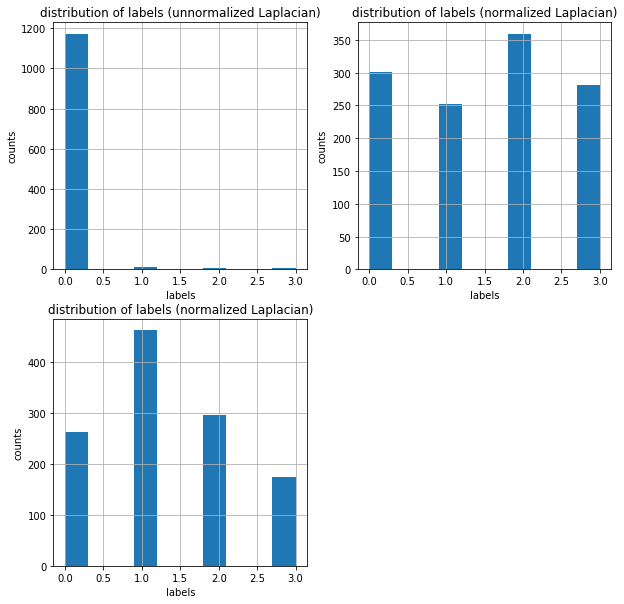

In [105]:
k = 4
d = 6
labels_unnormal = Kmeans(laplacian, k, d)
labels_normal   = Kmeans(laplacian_normalized, k, d)

evals_renorm, evecs_renorm =  sparse.linalg.eigs(laplacian, d, M=np.diag(degree), which='SM')
labels_renormal   = Kmeans_eigen(evecs_renorm, k)

plt.figure(figsize=(10,10))

subplot(221)
plt.hist(labels_unnormal);
plt.grid()
plt.title ('distribution of labels (unnormalized Laplacian)')
plt.xlabel('labels')
plt.ylabel('counts');

subplot(222)
plt.hist(labels_normal);
plt.grid()
plt.title ('distribution of labels (normalized Laplacian)')
plt.xlabel('labels')
plt.ylabel('counts');

subplot(223)
plt.hist(labels_renormal);
plt.grid()
plt.title ('distribution of labels (normalized Laplacian)')
plt.xlabel('labels')
plt.ylabel('counts');

In our prediction, there are four clusters corresponds to different genres which include Romance, Adventure, Thriller, Documentary, Drama and etc. As we can see from the prediction, huge numbers of nodes (the highest bar in the figure above) contain the label "Drama". This phenomenon can be traced back to our dataset. In the IMDB_5000 dataset, each movie is labeled with several genres. We can see that a large portion of the movies is labeled with Drama, along with some others genre. Hence, movies labeled with Drama will be gathered easier, decreasing the visibility of their other labels. In comparison, movies labeled with 'Thriller' are also clustered into a cluster but its counts are much less than the counts of 'Drama'.

---

### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [106]:
def order_adj(labels, adjacency):
    #----- create new order ----- #
    a = (np.where(labels == 0)[0])
    b = (np.where(labels == 1)[0])
    c = (np.where(labels == 2)[0])
    d = (np.where(labels == 3)[0])

    order = np.concatenate((a, b))
    order = np.concatenate((order, c))
    order = np.concatenate((order, d))

    adj_new = np.zeros(adjacency.shape)
    for i in range (adjacency.shape[0]):
        adj_new[i, :] = adjacency[order[i], :]  
    
    return adj_new

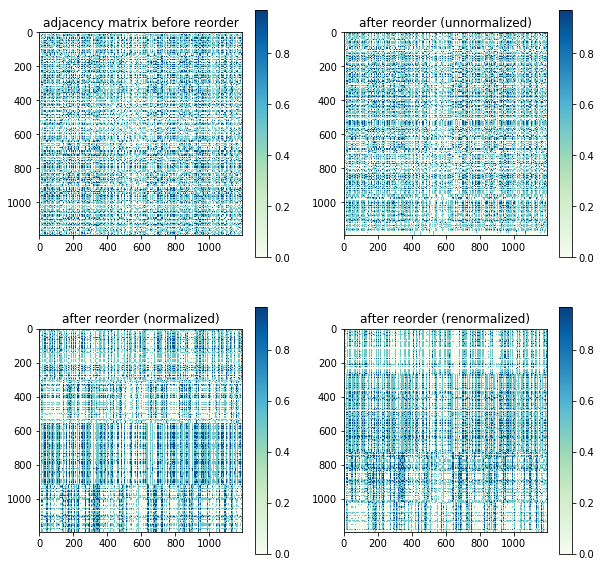

In [107]:
#----- show the matrix ----- #
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(adjacency, cmap="GnBu")
plt.title('adjacency matrix before reorder')
plt.colorbar()

plt.subplot(222)
plt.imshow(order_adj(labels_unnormal, adjacency), cmap="GnBu")
plt.title('after reorder (unnormalized)')
plt.colorbar();

plt.subplot(223)
plt.imshow(order_adj(labels_normal, adjacency), cmap="GnBu")
plt.title('after reorder (normalized)')
plt.colorbar();

plt.subplot(224)
plt.imshow(order_adj(labels_renormal, adjacency), cmap="GnBu")
plt.title('after reorder (renormalized)')
plt.colorbar();

**Your answer here.**

We expect that the pattern of the reordered adjacency matrix will be more regular because we cluster the nodes that are more similar to each other. Viewing from the reordered adjacency matrix, we can see that, all the three reordered adjacency have indeed 4 different patterns in different parts of the reordered adjacency matrix as our expectation. Moreover, the normalized and renormalized Laplacians perform much better than unnormalized Laplacian.

---

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

<span style="color:red">*Attention please:*</span> Since our graph is about genres which is a one to many mapping, it is difficult to define `TRUE` clusters. So, we create a credits graph to test the cluster assignment because each movie only has one average credit and it is easier to find the true clusters. The credits network is defined by the similarity of credits, i.e. the more similar, the higher weight. To define the groundtruth, we project the original credits to 7 labels, from 0 to 6 and plot the cluster results with different colors.

In [108]:
# load adjacency matrix created for credits graph
adjacency_credits = np.load('adjacency_credits_linear.npy')  
score_groundtruth = np.load('label_credit_groundtruth.npy')
np.fill_diagonal(adjacency_credits,0)
adjacency_credits[adjacency_credits<0.5] = 0

# drop isolate nodes
degree_credits = np.sum(adjacency_credits, axis = 1)
adjacency_credits = np.delete(adjacency_credits, np.where(degree_credits == 0)[0], 0)
adjacency_credits = np.delete(adjacency_credits, np.where(degree_credits == 0)[0], 1)
score_groundtruth = np.delete(score_groundtruth, np.where(degree_credits == 0)[0], 0)
degree_credits = np.sum(adjacency_credits, axis = 1)

In [110]:
# compute laplacian of credits graph
adjacency_credits_csr = sparse.csr_matrix(adjacency_credits)
degree_credits_csr = sparse.csr_matrix(np.diag(degree_credits))

laplacian_credits_combinatorial = degree_credits_csr - adjacency_credits_csr
laplacian_credits_normalized    = degree_credits_csr.power(-0.5).dot(laplacian_credits_combinatorial).dot(degree_credits_csr.power(-0.5))

laplacian_credits = laplacian_credits_combinatorial.toarray() # Either laplacian_combinatorial or laplacian_normalized.

In [111]:
_, evecs_unnorm_credits =  sparse.linalg.eigsh(laplacian_credits, k = 3, which='SM')

_, evecs_renorm_credits_credits =  sparse.linalg.eigsh(laplacian_credits, k = 3, M=np.diag(degree_credits), which='SM')
evecs_renorm_credits_csr = sparse.csr_matrix(evecs_renorm_credits)

evecs_norm_credits_csr = degree_credits_csr.power(0.5).dot(evecs_renorm_credits_csr)
evecs_norm_credits = evecs_norm_credits_csr.toarray()

In [135]:
# cluster eigenvectors by k-means
clusters = 2
label_unnormal_credits     = Kmeans_eigen(evecs_unnorm_credits, clusters)
label_normal_credits       = Kmeans_eigen(evecs_norm_credits  , clusters)
label_renormal_credits     = Kmeans_eigen(evecs_renorm_credits, clusters)

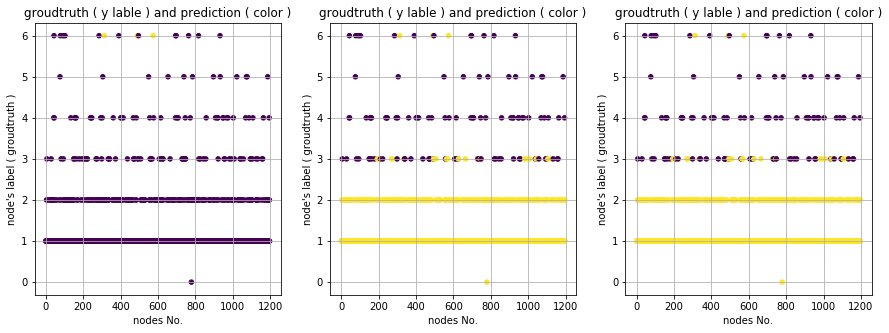

In [136]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.scatter(range(0, score_groundtruth.shape[0]), score_groundtruth, \
            c=label_unnormal_credits, s=20)
plt.grid()
plt.xlabel('nodes No.')
plt.ylabel("node's label ( groudtruth )")
plt.title ('groudtruth ( y lable ) and prediction ( color )')


plt.subplot(132)
plt.scatter(range(0, score_groundtruth.shape[0]), score_groundtruth, \
            c=label_normal_credits, s=20)
plt.grid()
plt.xlabel('nodes No.')
plt.ylabel("node's label ( groudtruth )")
plt.title ('groudtruth ( y lable ) and prediction ( color )')


plt.subplot(133)
plt.scatter(range(0, score_groundtruth.shape[0]), score_groundtruth, \
            c=label_renormal_credits, s=20)
plt.grid()
plt.xlabel('nodes No.')
plt.ylabel("node's label ( groudtruth )")
plt.title ('groudtruth ( y lable ) and prediction ( color )');

Here we use the credit graph as the tested graph. The first figure is the clustering results using unnormalized Laplacian and the second and third figures correspond to clustering with normalized and renormalized Laplacians.

In above figures, the x coordinate of a point is it's number in the graph and the the y coordinate is it's true label. So, there are about 1200 points and 7 classes. To make it easy to understand, we draw points from different clusters with defferent colors. Although here we only use two clusters, having more clusters is also applicable by change the `clusters` in the fourth cell.

It is obvious that in the 2nd and 3rd figures, there are only a few of nodes been classified wrongly and the separating threshold 3 is the median value amongst 7 groudtruth lables. In contrast, in the 1st figure, the clustering is not 'wrong' but it is not correct and resonable. Therefore, the normalized and renormalized Laplacians outperform the unnormalized Laplacian.

---

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

In [139]:
label_unnormal  = Kmeans(laplacian, 4, 3)
label_normal    = Kmeans_eigen(evecs_norm, 4)
label_renormal  = Kmeans_eigen(evecs_renorm, 4)

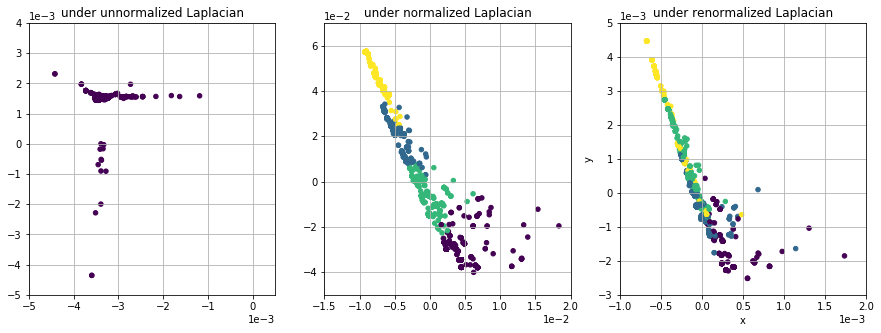

In [140]:
plt.figure(figsize=[15,5])

plt.subplot(131)
plt.scatter(np.real(evecs_unnorm[:,1]), np.real(evecs_unnorm[:,2]), c=label_unnormal, s = 20)
plt.xlim(-0.005,0.0005)
plt.ylim(-0.005,0.004)
plt.grid()
plt.title('under unnormalized Laplacian')
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.subplot(132)
plt.scatter(np.real(evecs_norm[:,1]), np.real(evecs_norm[:,2]), c = label_normal, s = 20)
plt.xlim(-0.015,0.02)
plt.ylim(-0.05,0.07)
plt.grid()
plt.title('under normalized Laplacian')
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.subplot(133)
plt.scatter(np.real(evecs_renorm[:,1]), np.real(evecs_renorm[:,2]), c = label_renormal, s = 20)
plt.xlim(-0.001,0.002)
plt.ylim(-0.003,0.005)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('under renormalized Laplacian');
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.show()

Above is the clustering results of our genre graph. As shown above, the result is very good when we use normalizd and renormalized laplacians, as the data are separated into 4 custers. However, when unnormalized laplacian is implemented, most of the data are abnormlly grouped to the same cluster, which means this method is not suitable for our graph.

Below we also plot the results of clustering of the credits graph.

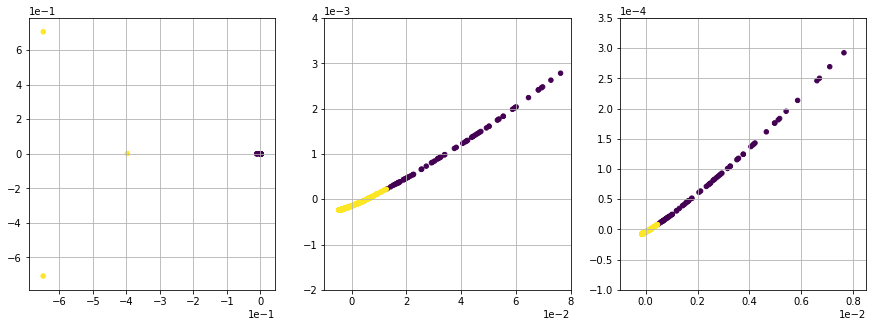

In [161]:
plt.figure(figsize=[15,5])

plt.subplot(131)
plt.scatter(np.real(evecs_unnorm_credits[:,1]), np.real(evecs_unnorm_credits[:,2]), c=label_unnormal_credits, s = 20)
# plt.xlim(-0.003,0.005)
# plt.ylim(-0.005,0.0005)
plt.grid()
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.subplot(132)
plt.scatter(np.real(evecs_norm_credits[:,1]), np.real(evecs_norm_credits[:,2]), c=label_normal_credits, s = 20)
plt.xlim(-0.01,0.08)
plt.ylim(-0.002,0.004)
plt.grid()
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

plt.subplot(133)
plt.scatter(np.real(evecs_renorm_credits[:,1]), np.real(evecs_renorm_credits[:,2]), c=label_renormal_credits, s = 20)
plt.xlim(-0.001,0.0085)
plt.ylim(-0.0001,0.00035)
plt.grid()
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.get_major_formatter().set_powerlimits((0,1))

The result is similar to the result of genre graph and is consistent with the result and discussion in Question 13: the normalized and renormalized Laplacians outperform the unnormalized Laplacian.

---

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

**Your answer here.**

When we want to partition a graph, what we need is to find a clustering strategy which can make the connections between different clusters as small as possible. This strategy can be rephrase as a optimization problem and the solution to the problem is eigenvectors of the graph. Moreover, the smaller of the eigenvalue, the less connections. For this reason, we use eigenvectors of the graph Laplacian as features and we prefer to use the k smallest non-zero eigenvectors.

For supervised learning, there are some other algorithms such as fisher linear discriminant analysis and random forest which use the raw dara as features.

---